In [1]:
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = []
labels = []


In [3]:
for file in glob.glob(os.path.join('Dataset','*.txt')): # Recursively looking at all the text files in the folder
    label = os.path.basename(file.split('.')[0])
    with open(file,'r', encoding='utf-8') as f:
        s = f.readlines()
        data.extend(s[i] for i in range(16521))
        labels.extend([label] * len(s))
        

In [4]:
data[:5]

['maak my wakker nege-uur v. m. op vrydag\n',
 "stel 'n alarm vir twee ure van nou af\n",
 'janneman stilte\n',
 'stop\n',
 'janneman onderbreek dit vir tien sekondes\n']

In [5]:
data = [sentence[:-1] for sentence in data] # to remove the \n characters

In [6]:
data[:5]

['maak my wakker nege-uur v. m. op vrydag',
 "stel 'n alarm vir twee ure van nou af",
 'janneman stilte',
 'stop',
 'janneman onderbreek dit vir tien sekondes']

In [7]:
len(data), len(labels)

(446067, 446067)

In [8]:
text2vec =  TfidfVectorizer() # converting the text to numerical format

1. TfidfVectorizer is also a pre-processing technique used to convert text data into numerical form. 
2. TfidfVectorizer not only counts the frequency of each word but also assigns a weight to each word based on its frequency in the document and its frequency in the entire corpus. 
This means that it gives higher weights to words that are important or informative in the document and lower weights to common words that are not. This is achieved through a term frequency-inverse document frequency (TF-IDF) formula that balances the frequency of a word in a document with its frequency in the entire corpus.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
# Results in 80% training data, 20% test data

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.125, random_state=42, stratify=Y_train) 
# Results in 70% training data, 10% Validation data

In [11]:
x_train = text2vec.fit_transform(X_train)
x_test = text2vec.transform(X_test)
x_val = text2vec.transform(X_val)

In [12]:
x_train

<312246x153532 sparse matrix of type '<class 'numpy.float64'>'
	with 1934798 stored elements in Compressed Sparse Row format>

In [13]:
classifier = MultinomialNB()

In [14]:
classifier.fit(x_train, Y_train)

MultinomialNB()

In [15]:
# Fine tuning the Multinomail Naive Bayes using Validation data

In [16]:
param = {'alpha' : (2.0, 1.5, 1, 0.1, 0.01, 0.001)}

In [17]:
Classifier = GridSearchCV(classifier, param, cv = 5, scoring='accuracy')

In [18]:
Classifier.fit(x_val, Y_val)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': (2.0, 1.5, 1, 0.1, 0.01, 0.001)},
             scoring='accuracy')

In [19]:
classifier_1 = Classifier.best_estimator_
classifier_1

MultinomialNB(alpha=0.1)

In [20]:
y_pred_val = classifier_1.predict(x_val)

In [21]:
val_accuracy = metrics.accuracy_score(Y_val, y_pred_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9920416078194005


In [22]:
print("validation Data Performace Metrics:")
print(metrics.classification_report(Y_val, y_pred_val))

validation Data Performace Metrics:
              precision    recall  f1-score   support

       af-ZA       1.00      0.99      0.99      1652
       cy-GB       1.00      1.00      1.00      1652
       da-DK       0.98      0.98      0.98      1652
       de-DE       1.00      0.99      0.99      1652
       en-US       0.99      1.00      0.99      1652
       es-ES       1.00      1.00      1.00      1652
       fi-FI       1.00      0.99      1.00      1652
       fr-FR       0.99      1.00      0.99      1652
       hu-HU       0.92      1.00      0.96      1653
       is-IS       1.00      0.99      1.00      1652
       it-IT       0.99      0.99      0.99      1652
       jv-ID       1.00      0.99      0.99      1652
       lv-LV       1.00      0.99      1.00      1652
       ms-MY       0.99      1.00      0.99      1652
       nb-NO       0.98      0.98      0.98      1652
       nl-NL       0.99      0.99      0.99      1652
       pl-PL       1.00      0.99      1.00  

Text(170.72222222222223, 0.5, 'Predicted label')

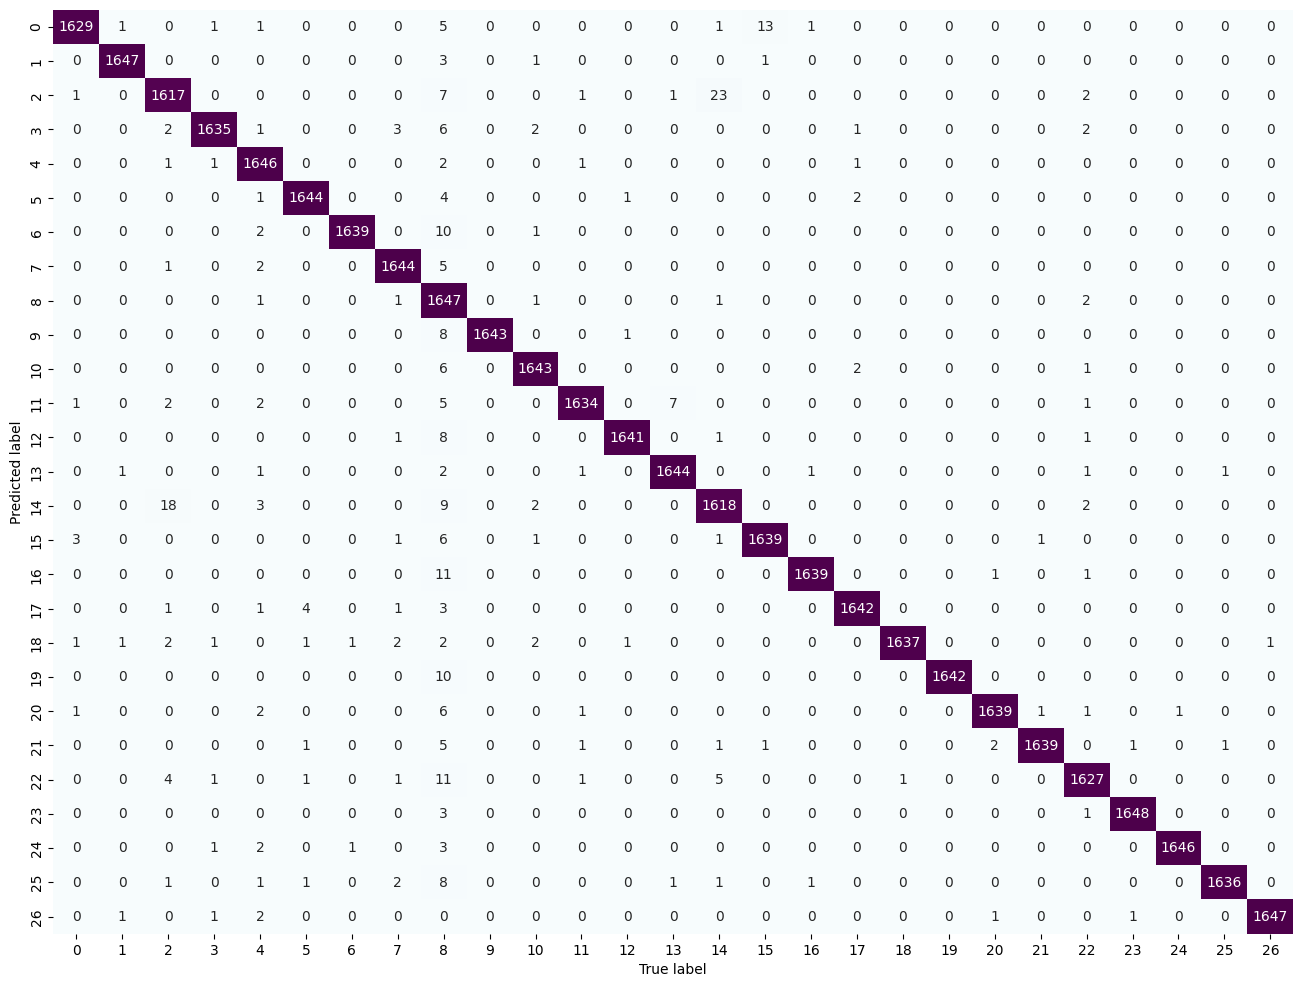

In [23]:
confusion_matrix = metrics.confusion_matrix(Y_val, y_pred_val)
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [24]:
y_pred_train = classifier_1.predict(x_train)
train_accuracy = metrics.accuracy_score(Y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.9722206209206843


In [25]:
print("Train Data Performace Metrics:")
print(metrics.classification_report(Y_train, y_pred_train))

Train Data Performace Metrics:
              precision    recall  f1-score   support

       af-ZA       0.97      0.96      0.96     11565
       cy-GB       0.99      0.99      0.99     11565
       da-DK       0.91      0.92      0.92     11565
       de-DE       0.99      0.97      0.98     11565
       en-US       0.94      0.98      0.96     11565
       es-ES       0.97      0.97      0.97     11565
       fi-FI       0.83      0.99      0.90     11564
       fr-FR       0.98      0.99      0.98     11564
       hu-HU       0.99      0.96      0.98     11564
       is-IS       1.00      0.98      0.99     11565
       it-IT       0.98      0.98      0.98     11564
       jv-ID       0.99      0.97      0.98     11565
       lv-LV       0.99      0.98      0.99     11565
       ms-MY       0.98      0.98      0.98     11565
       nb-NO       0.92      0.91      0.92     11564
       nl-NL       0.96      0.95      0.96     11565
       pl-PL       0.99      0.97      0.98     11

Text(170.72222222222223, 0.5, 'Predicted label')

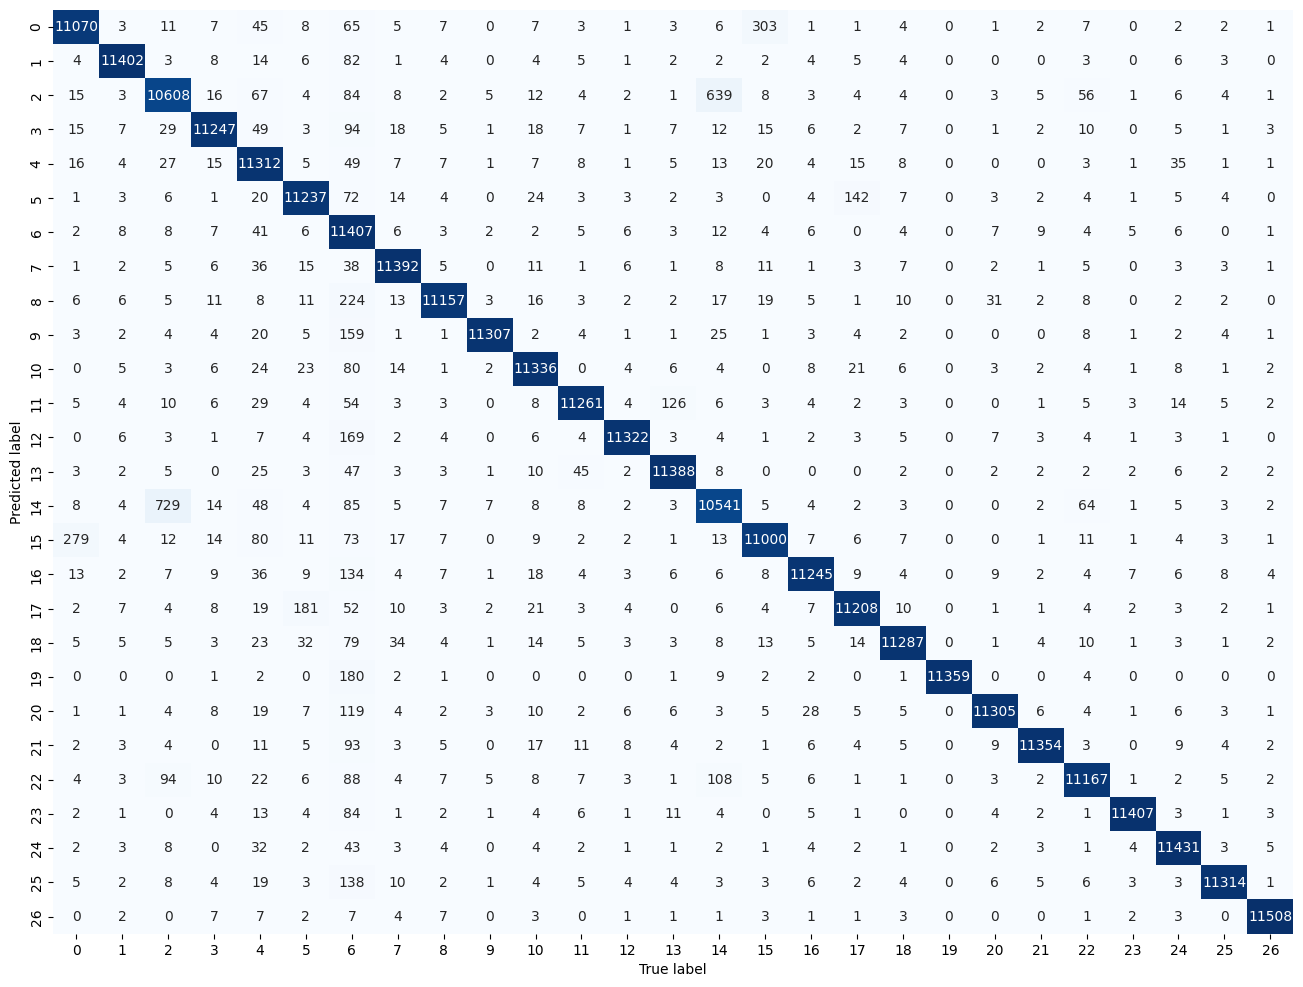

In [26]:
confusion_matrix = metrics.confusion_matrix(Y_train, y_pred_train)
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [27]:
y_pred_test = classifier_1.predict(x_test)
test_accuracy = metrics.accuracy_score(Y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9726164054968951


In [28]:
print("Test Data Performace Metrics:")
print(metrics.classification_report(Y_test, y_pred_test))

Test Data Performace Metrics:
              precision    recall  f1-score   support

       af-ZA       0.97      0.96      0.96      3304
       cy-GB       0.99      0.98      0.99      3304
       da-DK       0.92      0.92      0.92      3304
       de-DE       0.99      0.98      0.98      3304
       en-US       0.94      0.98      0.96      3304
       es-ES       0.97      0.97      0.97      3304
       fi-FI       0.88      0.98      0.93      3305
       fr-FR       0.98      0.98      0.98      3305
       hu-HU       0.92      0.97      0.95      3304
       is-IS       1.00      0.98      0.99      3304
       it-IT       0.98      0.98      0.98      3305
       jv-ID       0.99      0.97      0.98      3304
       lv-LV       0.99      0.98      0.99      3304
       ms-MY       0.98      0.98      0.98      3304
       nb-NO       0.92      0.91      0.91      3305
       nl-NL       0.96      0.96      0.96      3304
       pl-PL       0.99      0.98      0.98      33

Text(170.72222222222223, 0.5, 'Predicted label')

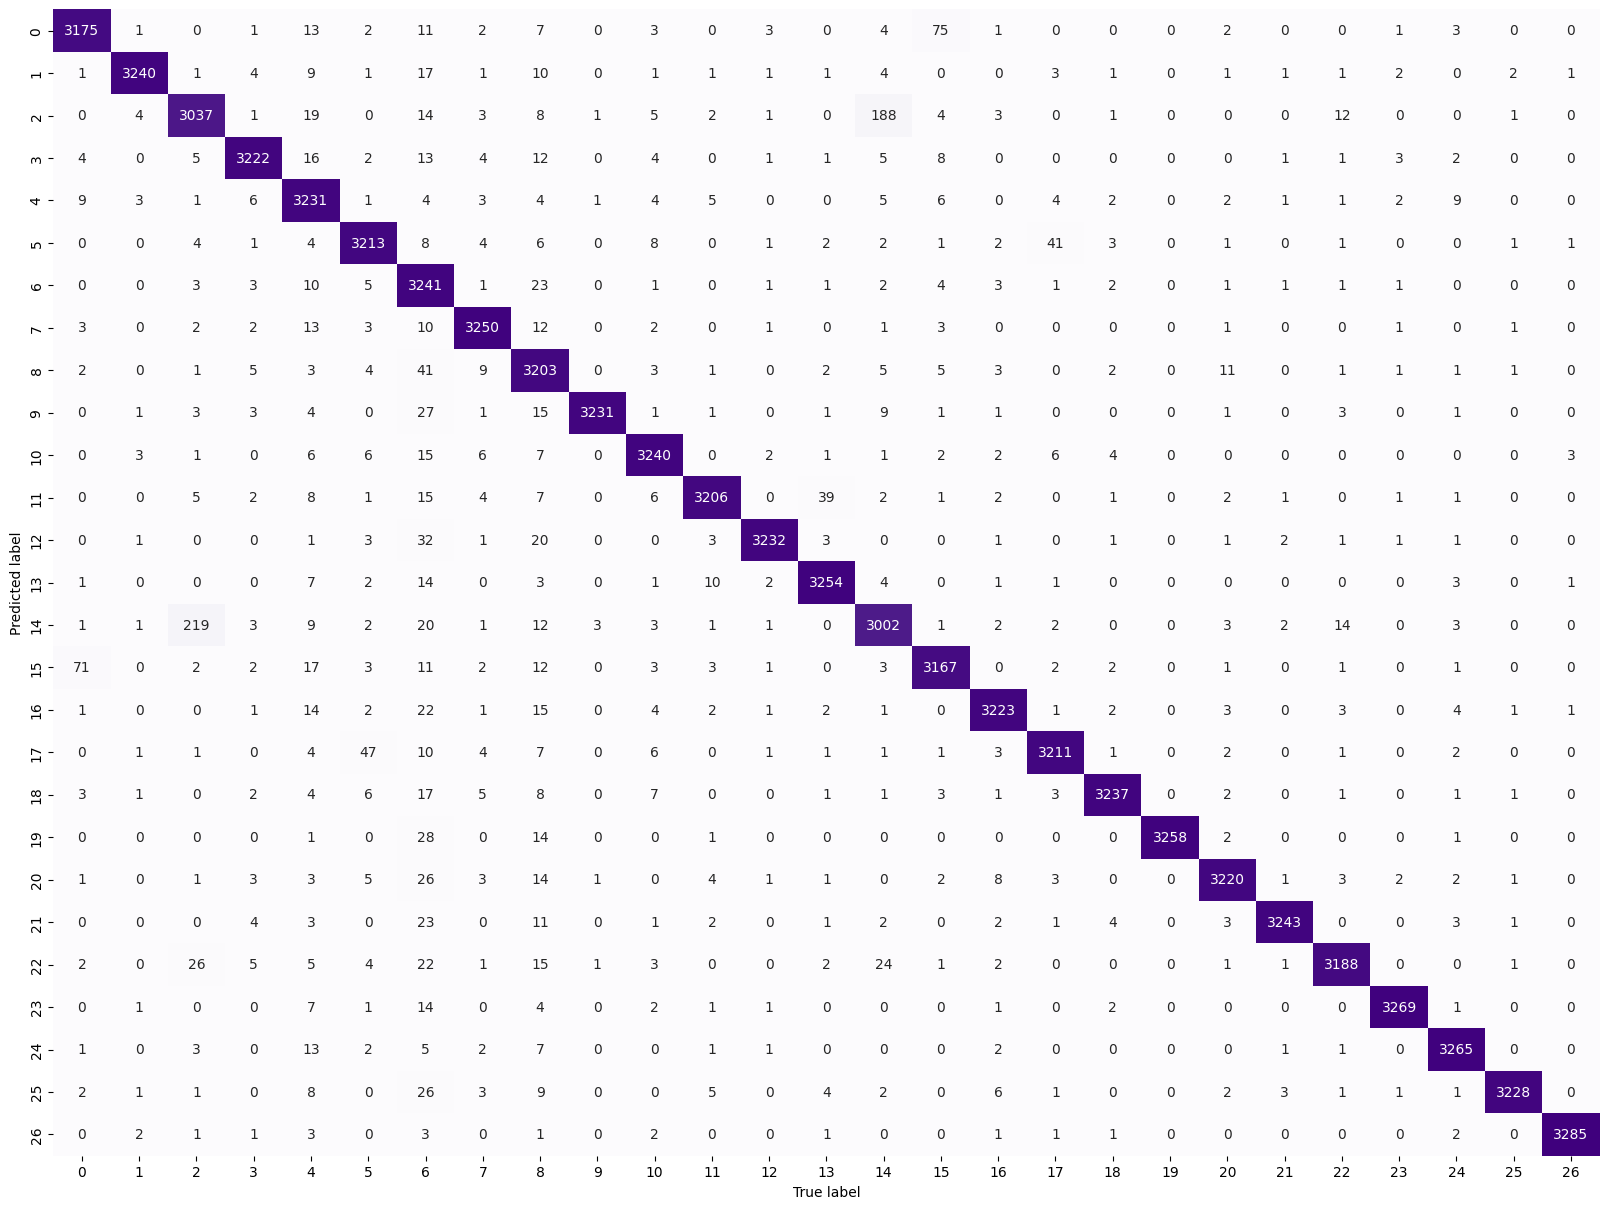

In [29]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.tight_layout()
plt.xlabel("True label")
plt.ylabel("Predicted label")

The Performance metrics of  multinomial Naive Bayes classifier on Train, Test and Validation set is reported. The metrics reported indicate that the model is able to generalize better and is able to predict on unseen test data. The Test accuracy being approximately close enough to the Training and validation accuracy is an indication of the same.

The Confusion matrices of Train, Test and Validation depict that most of the samples from the corpus are classified correctly to their respective classes with a few misclassification associated with each class.